In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('./housing.csv')

In [3]:
# df.columns = df.columns.str.lower().str.replace(' ', '_')

# string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# for col in string_columns:
#     df[col] = df[col].str.lower().str.replace(' ', '_')


In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df = df[[
    'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [5]:
# Q1
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

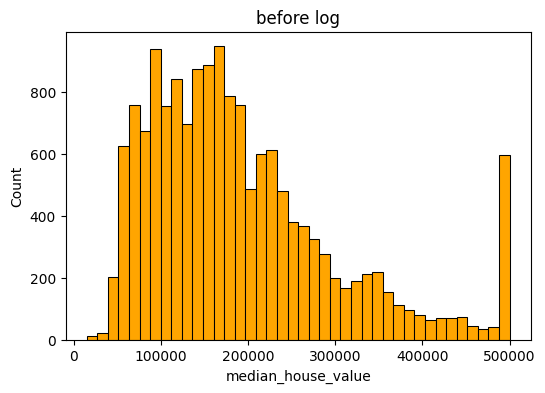

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='orange', alpha=1)
plt.title('before log')

plt.show()

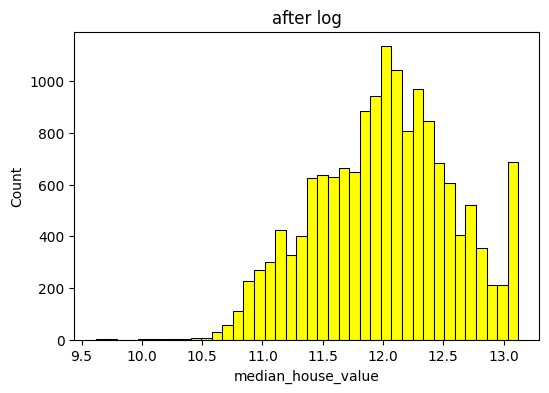

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(df.median_house_value), bins=40, color='yellow', alpha=1)
plt.title('after log')

plt.show()

In [8]:
# Q2
df['population'].median()

1195.0

In [9]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [12]:
base = [
    'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [13]:
# Q3

X_train = df_train.values
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan, nan, nan, nan]))

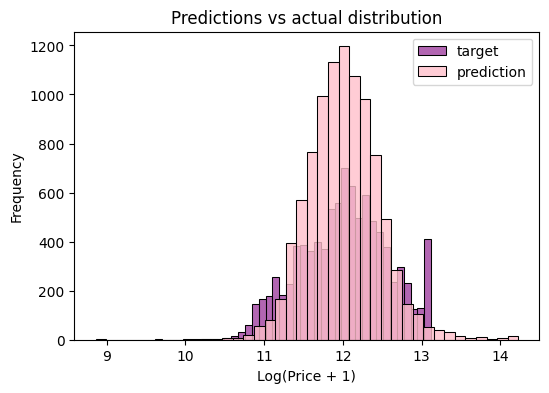

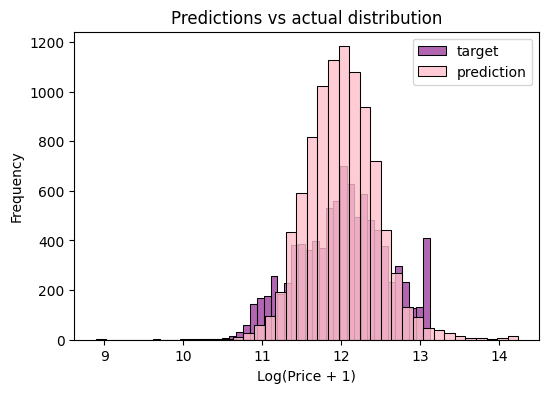

(None, None)

In [14]:
X_train_filled_zero = df_train.fillna(0).values
X_train_filled_mean = df_train.fillna(df['total_bedrooms'].mean()).values


def rmse(y, y_pred):
    error = y_pred - y
    
    mse = (error ** 2).mean()

    return np.sqrt(mse)



def show_plot(X_train_filled, y_train, train_func):
    w0, w = train_func(X_train_filled, y_train)
    y_pred = w0 + X_train_filled.dot(w)

    plt.figure(figsize=(6, 4))

    sns.histplot(y_train, label='target', color='purple', alpha=0.6, bins=40)
    sns.histplot(y_pred, label='prediction', color='pink', alpha=0.8, bins=40)

    plt.legend()

    plt.ylabel('Frequency')
    plt.xlabel('Log(Price + 1)')
    plt.title('Predictions vs actual distribution')

    plt.show()


show_plot(X_train_filled_zero, y_train, train_linear_regression), show_plot(X_train_filled_mean, y_train, train_linear_regression)

In [28]:
# show_plot(X_train_filled_zero, y_train, train_linear_regression_reg), show_plot(X_train_filled_mean, y_train, train_linear_regression_reg)

In [24]:
# Q4
regs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

def show_rmse_reg(X_train_filled, y_train, r):
    w0, w = train_linear_regression_reg(X_train_filled, y_train, r)
    y_pred = w0 + X_train_filled.dot(w)
    
    return rmse(y_train, y_pred)

for r in regs: print(r, round(show_rmse_reg(X_train_filled_zero, y_train, r), 2))


w0, w = train_linear_regression_reg(X_train_filled_mean, y_train, 0.01)
y_pred = w0 + X_train_filled_mean.dot(w)

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


array([11.48271629, 12.14304605, 12.45160715, ..., 12.91548607,
       11.93435424, 12.11213923])

In [25]:
# Q5

df = pd.read_csv('./housing.csv')
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df = df[[
    'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]]

def show_rmse_seed(s):
    np.random.seed(s)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train_filled = df_train.fillna(0).values
    
    w0, w = train_linear_regression(X_train_filled, y_train)
    y_pred = w0 + X_train_filled.dot(w)
    
    return rmse(y_train, y_pred)

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for s in seeds: scores.append(show_rmse_seed(s))

round(np.std(scores), 3)

0.003

In [49]:
df = pd.read_csv('./housing.csv')
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df = df[[
    'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]]

np.random.seed(9)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_full = np.log1p(df_train.median_house_value.values + df_val.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


df_full = pd.concat([df_train, df_val])
y_full
# y_full = pd.concat([y_train, y_val])

# np.concatenate(y_train, y_val)
# X_train_filled = df_train.fillna(0).values

# w0, w = train_linear_regression_reg(X_train_filled, y_train, 0.001)
# y_pred = w0 + X_train_filled.dot(w)

# rmse(y_train, y_pred)


ValueError: operands could not be broadcast together with shapes (9413,) (3137,) 

In [35]:
np.__version__

'1.26.0'

In [1]:
[1] + [2]

[1, 2]